## Проект 2. Разведывательный анализ данных

### Первичный отсмотр данных

В данном проекте будет отслежено влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Осмотрим данные, которые хранятся в файле и какие типы данных у столбцов.

In [2]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Первичный анализ данных в столбцах

Рассмотрим все столбцы по отдельности

### school

In [3]:
display(pd.DataFrame(stud.school.value_counts()))
stud.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения с подавляющим большинством "GP"

### sex

In [4]:
display(pd.DataFrame(stud.sex.value_counts()))
stud.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения с подавляющим большинством "F"(девочек)

### age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


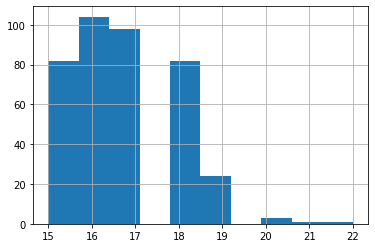

In [5]:
stud.age.hist()
stud.age.describe()
stud.loc[:, ['age']].info()

У этого признака выбросов нет. Видно, что основная часть это люди 16-17 лет.

### address

In [7]:
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [8]:
stud.address = stud.address.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [9]:
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

,address
U,295
R,83
nan,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


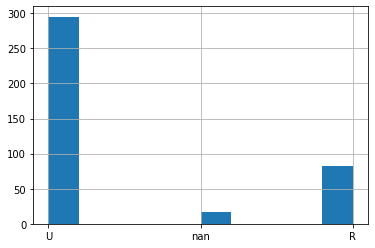

In [10]:
stud.address.hist()
stud.address.describe()
stud.loc[:, ['address']].info()

У этого признака выбросов нет. Видно, что в основном тип адреса ученика это 'U' - городской.

### famsize

In [11]:
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [12]:
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [13]:
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107
nan,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


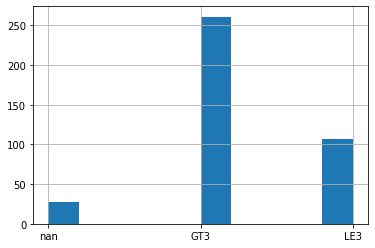

In [14]:
stud.famsize.hist()
stud.famsize.describe()
stud.loc[:, ['famsize']].info()

У этого признака выбросов нет. Видно, что в основном размер семьи больше 3.

### Pstatus

In [15]:
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [16]:
stud.Pstatus = stud.Pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [17]:
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[:, ['Pstatus']].info()

,Pstatus
T,314
nan,45
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


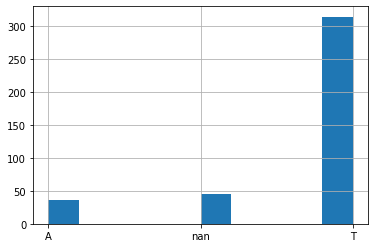

In [18]:
stud.Pstatus.hist()
stud.Pstatus.describe()
stud.loc[:, ['Pstatus']].info()

У этого признака выбросов нет. Видно, что в основном статус совместного жилья родителей 'T' - живут вместе.

### Medu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


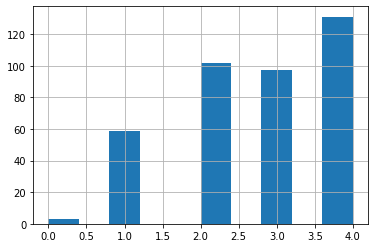

In [19]:
stud.Medu.hist()
stud.Medu.describe()
stud.loc[:, ['Medu']].info()

In [20]:
display(pd.DataFrame(stud.Medu.value_counts()))
stud.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заполним пропуски

In [21]:
stud.Medu = stud.Medu.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [22]:
display(pd.DataFrame(stud.Medu.value_counts()))
stud.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
nan,3
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Medu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


У этого признака выбросов нет. Видно, что в основном образование матерей высшее.

### Fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

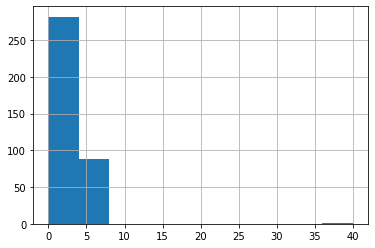

In [23]:
stud.Fedu.hist()
stud.Fedu.describe()

Как видно, оценки распределены между 2 и 3 (медиана 2, 25-й перцентиль 2 и 75-й — 3), что позволяет сделать два предположение, что в данных есть выбросы. Нужно это проверыть.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


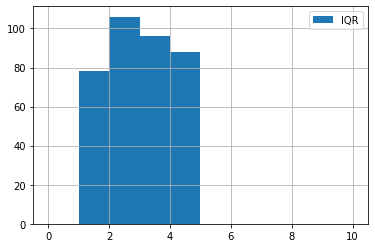

In [24]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.Fedu.loc[stud.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Отфильтруем данные

In [25]:
stud.Fedu = stud.Fedu[stud.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заполним пропуски

In [26]:
stud.Fedu = stud.Fedu.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [27]:
display(pd.DataFrame(stud.Fedu.value_counts()))
stud.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
nan,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fedu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Видно, что в основном образование многих отцов 5-9 классы.

### Mjob

In [28]:
display(pd.DataFrame(stud.Mjob.value_counts()))
stud.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [29]:
stud.Mjob = stud.Mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [30]:
display(pd.DataFrame(stud.Mjob.value_counts()))
stud.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count       395
unique        6
top       other
freq        133
Name: Mjob, dtype: object

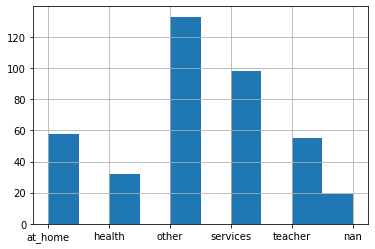

In [31]:
stud.Mjob.hist()
stud.Mjob.describe()

У этого признака выбросов нет. Видно, что в основном работа матери не связана с перечисленными специальностями.

### Fjob

In [32]:
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски 

In [33]:
stud.Fjob = stud.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [34]:
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count       395
unique        6
top       other
freq        197
Name: Fjob, dtype: object

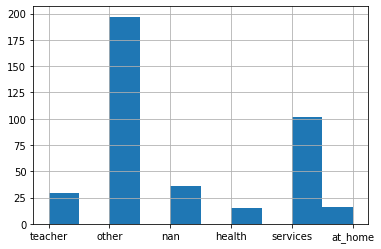

In [35]:
stud.Fjob.hist()
stud.Fjob.describe()

У этого признака выбросов нет. Видно, что в основном работа отцов не связана с перечисленными специальностями.

### reason

In [36]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [37]:
stud.reason = stud.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [38]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34
nan,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count        395
unique         5
top       course
freq         137
Name: reason, dtype: object

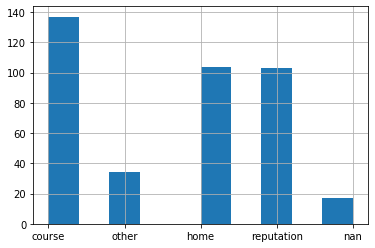

In [39]:
stud.reason.hist()
stud.reason.describe()

У этого признака выбросов нет. Видно, что в основном причина выбора школы в образовательной программе.

### guardian

In [40]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [41]:
stud.guardian = stud.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [42]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
nan,31
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count        395
unique         4
top       mother
freq         250
Name: guardian, dtype: object

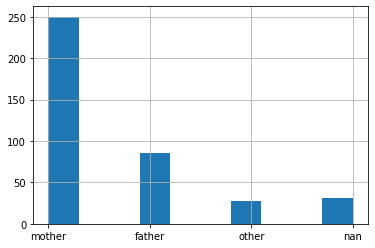

In [43]:
stud.guardian.hist()
stud.guardian.describe()

У этого признака выбросов нет. Видно, что в основном опекуном является мать.

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

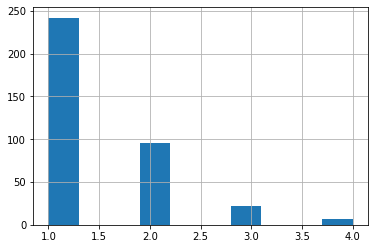

In [44]:
stud.traveltime.hist()
stud.traveltime.describe()

У этого признака выбросов нет. Видно, что в основном время в пути до школы менее 15 мин.
Заполним пропуски

In [45]:
stud.traveltime = stud.traveltime.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [46]:
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
nan,28
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### studytime

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

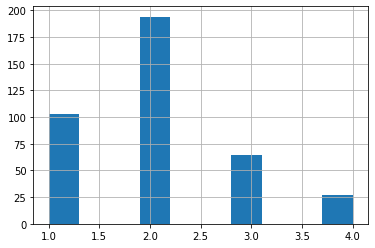

In [47]:
stud.studytime.hist()
stud.studytime.describe()

У этого признака выбросов нет. Видно, что в основном время на учёбу помимо школы в неделю занимает 2-5 часов. Заполним пропуски.

In [48]:
stud.studytime = stud.studytime.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [49]:
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
nan,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   studytime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### failures

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

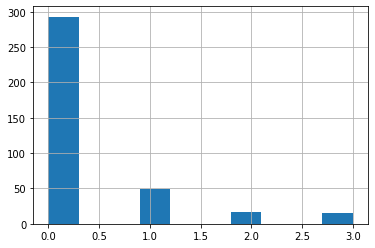

In [50]:
stud.failures.hist()
stud.failures.describe()

У этого признака выбросов нет. Видно, что в основном количество внеучебных неудач 0. Заполним пропуски.

In [51]:
stud.failures = stud.failures.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [52]:
display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
nan,22
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   failures  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### schoolsup

In [53]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [54]:
stud.schoolsup = stud.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [55]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51
nan,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top        no
freq      335
Name: schoolsup, dtype: object

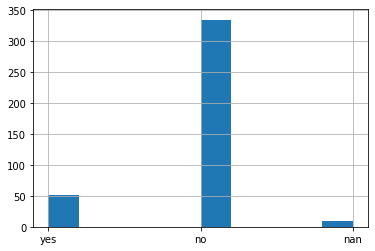

In [56]:
stud.schoolsup.hist()
stud.schoolsup.describe()

У этого признака выбросов нет. Видно, что в основном дополнительная образовательная поддержка отсутствует.

### famsup

In [57]:
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [58]:
stud.famsup = stud.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [59]:
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,famsup
yes,219
no,137
nan,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top       yes
freq      219
Name: famsup, dtype: object

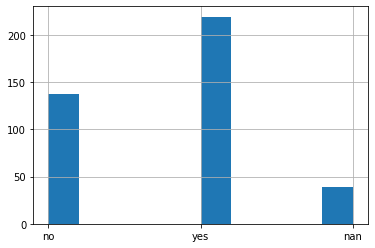

In [60]:
stud.famsup.hist()
stud.famsup.describe()

У этого признака выбросов нет. Видно, что в основном семейная образовательная поддержка присутствует.

### paid

In [61]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [62]:
stud.paid = stud.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [63]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,200
yes,155
nan,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top        no
freq      200
Name: paid, dtype: object

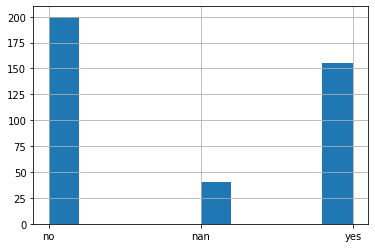

In [64]:
stud.paid.hist()
stud.paid.describe()

У этого признака выбросов нет. Видно, что в основном ученики не занимаются дополнительными платными занятиями по математике.

### activities

In [65]:
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [66]:
stud.activities = stud.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [67]:
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

,activities
yes,195
no,186
nan,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top       yes
freq      195
Name: activities, dtype: object

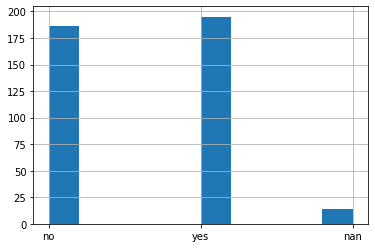

In [68]:
stud.activities.hist()
stud.activities.describe()

У этого признака выбросов нет. Видно, что дополнительными внеучебными занятиями занимаются и не занимаются примерно на одном уровне.

### nursery

In [69]:
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [70]:
stud.nursery = stud.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [71]:
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
nan,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top       yes
freq      300
Name: nursery, dtype: object

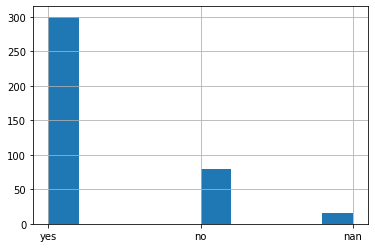

In [72]:
stud.nursery.hist()
stud.nursery.describe()

У этого признака выбросов нет. Видно, что в основном ученики посещали детский сад.

### higher

In [73]:
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [74]:
stud.higher = stud.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [75]:
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

,higher
yes,356
nan,20
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top       yes
freq      356
Name: higher, dtype: object

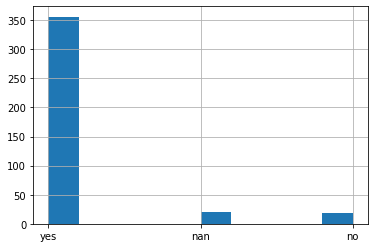

In [76]:
stud.higher.hist()
stud.higher.describe()

У этого признака выбросов нет. Видно, что в основном ученики хотят получить высшее образование.

### internet

In [77]:
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [78]:
stud.internet = stud.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [79]:
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

,internet
yes,305
no,56
nan,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top       yes
freq      305
Name: internet, dtype: object

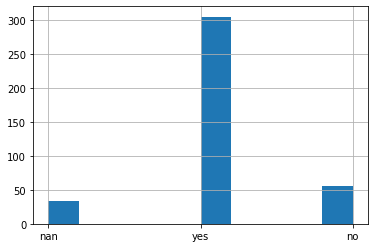

In [80]:
stud.internet.hist()
stud.internet.describe()

У этого признака выбросов нет. Видно, что в основном у большинства учеников есть интернет дома.

### romantic

In [81]:
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполним пропуски

In [82]:
stud.romantic = stud.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [83]:
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
nan,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      3
top        no
freq      240
Name: romantic, dtype: object

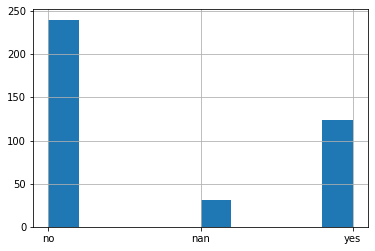

In [84]:
stud.romantic.hist()
stud.romantic.describe()

У этого признака выбросов нет. Видно, что в основном у большинства учеников нет романтических отношений.

### famrel

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

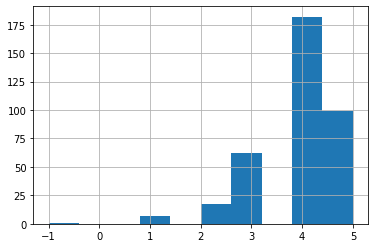

In [85]:
stud.famrel.hist()
stud.famrel.describe()

Как видно, оценки распределены между 4 и 5 (медиана 4, 25-й перцентиль 4 и 75-й — 5), что позволяет сделать два предположение, что в данных есть выбросы. Нужно это проверыть.

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


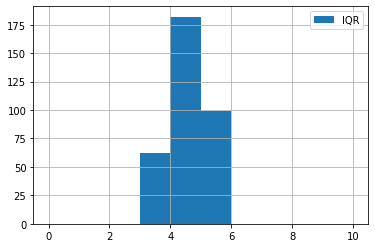

In [86]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.famrel.loc[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Отфильтруем данные

In [87]:
stud.famrel = stud.famrel[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заполним пропуски

In [89]:
stud.famrel = stud.famrel.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [90]:
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
nan,52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Видно, что семейные отношения на достаточно высоком уровне.

### freetime

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

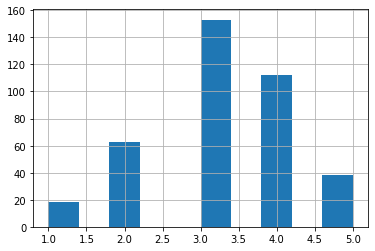

In [91]:
stud.freetime.hist()
stud.freetime.describe()

У этого признака выбросов нет. Видно, что в свободное время после школы у большинства учеников расположено примерно посередине на графике.

In [92]:
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заполним пропуски

In [93]:
stud.freetime = stud.freetime.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [94]:
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
nan,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   freetime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### goout

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

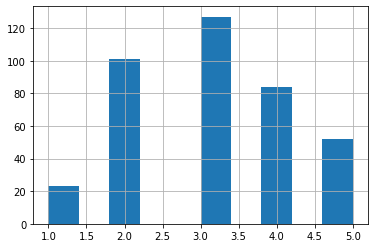

In [95]:
stud.goout.hist()
stud.goout.describe()

У этого признака выбросов нет. Видно, что в проведение времени с друзьями большинства учеников расположено примерно посередине на графике.

In [96]:
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заполним пропуски

In [97]:
stud.goout = stud.goout.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [98]:
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
nan,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   goout   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### health

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

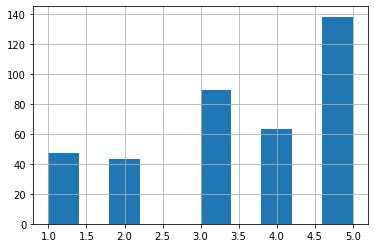

In [99]:
stud.health.hist()
stud.health.describe()

У этого признака выбросов нет. Видно, что у большинства учеников текущее состояние здоровья хорошее.

In [100]:
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заполним пропуски

In [101]:
stud.health = stud.health.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [102]:
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
nan,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

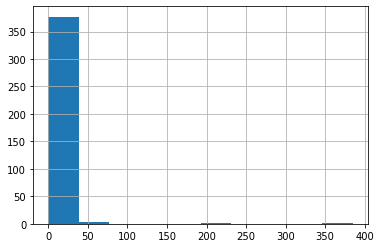

In [103]:
stud.absences.hist()
stud.absences.describe()

Как видно, большинство оценок распределены между 0 и 8 (медиана 4, 25-й перцентиль 0 и 75-й — 8). Это позволяет сделать предположение, что в данных есть выбросы. Необходимо это проверить.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


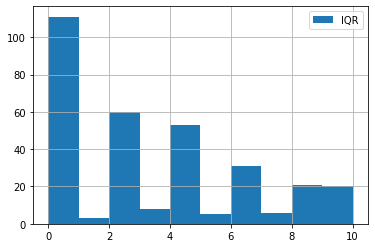

In [104]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Отфильтруем данные

In [105]:
stud.absences = stud.absences[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заполним пропуски

In [106]:
stud.absences = stud.absences.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [107]:
display(pd.DataFrame(stud.absences.value_counts()))
stud.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
nan,29
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Видно, что в основном занятия пропусками мало.

### score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

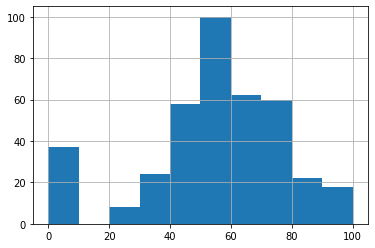

In [108]:
stud.score.hist()
stud.score.describe()

На данном графике видно, что есть ученики, набрашвие 0 баллов, возможно они не пришли на экзамен или плохо ответили. Не будет считать данные значеня за выброс.
Из графика можно сдалать вывод, что ученики получили средние баллы по госэкзамену по математике.

Заполним пропуски

In [109]:
stud.score = stud.score.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [111]:
display(pd.DataFrame(stud.score.value_counts()))
stud.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
40.0,31
65.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Корреляционный анализ

Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

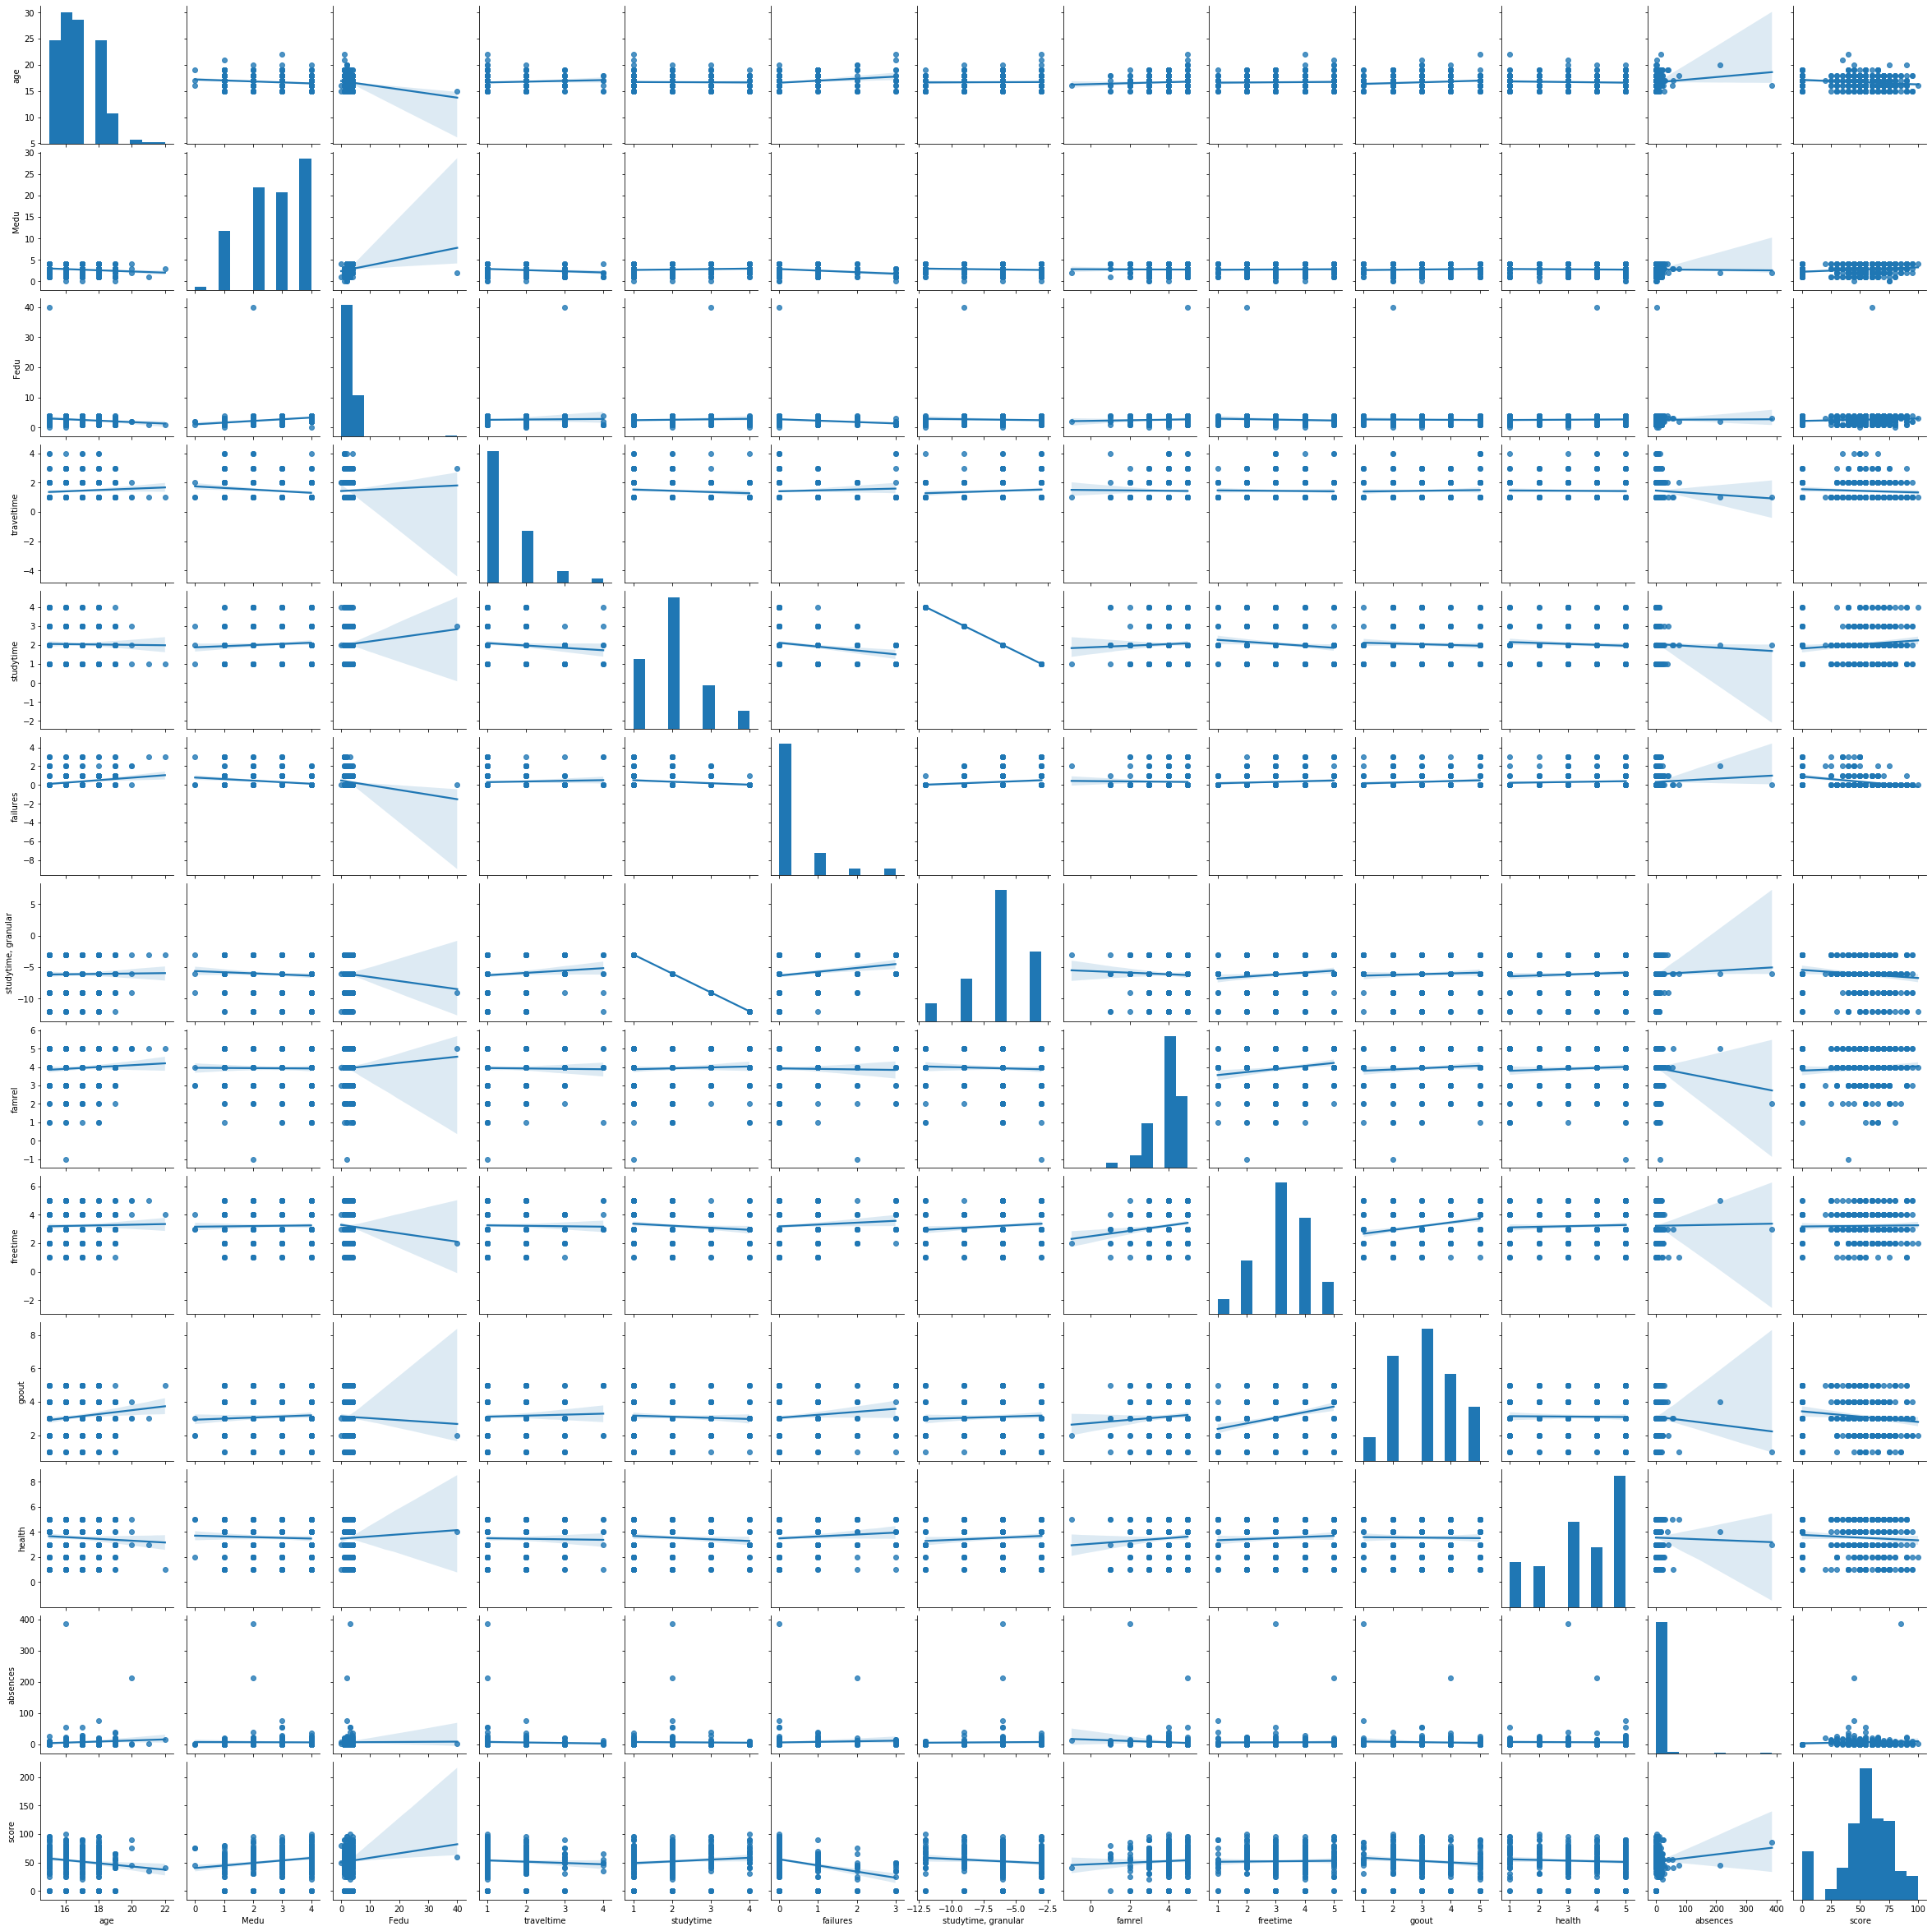

In [4]:
sns.pairplot(stud, kind='reg')

Используем для наглядности матрицу корреляций:

In [17]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Для более детального анализа построим тепловую карту.

In [13]:
 correlation = stud.corr()

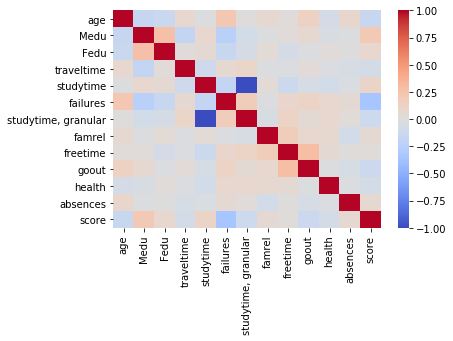

In [16]:
sns.heatmap(correlation, cmap = 'coolwarm')

По данному анализа можно сделать вывод, что нет сильно скорректированных показателей, поэтому можно включить в модель все. Но можно выделить показатели, у которых связь теснее: Medu, Fedu, studutime, famrel, freetime, absences.

### Анализ номинативных переменных

Проведем данный анализ с помощью box-plot. Рассмотрим номинативные переменные.

In [7]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

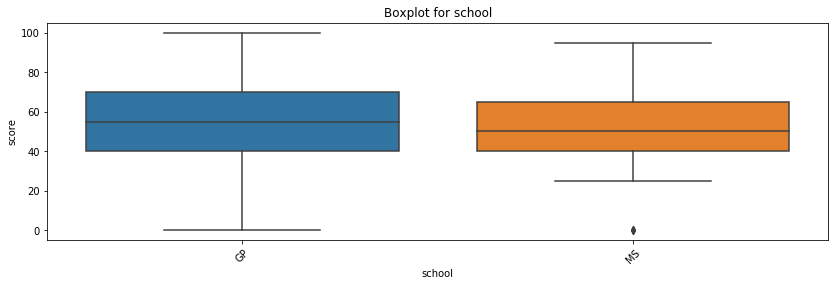

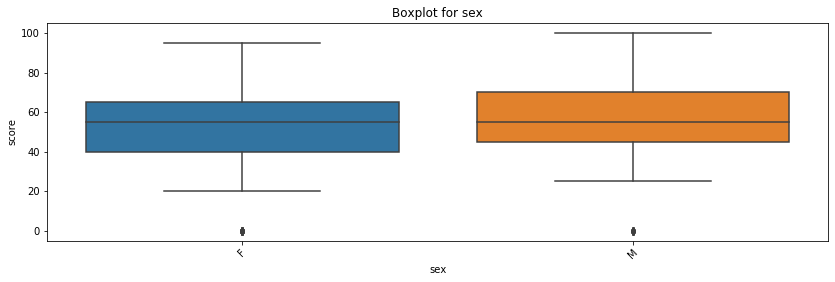

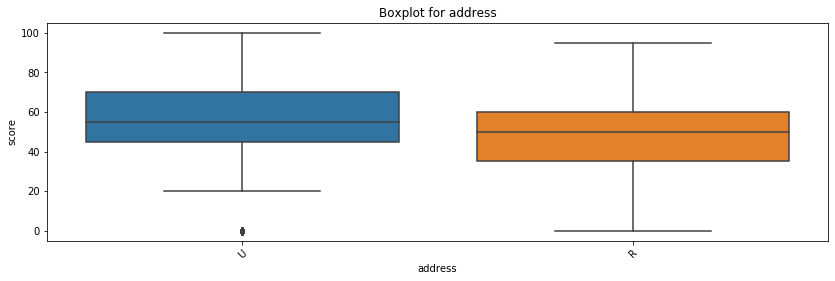

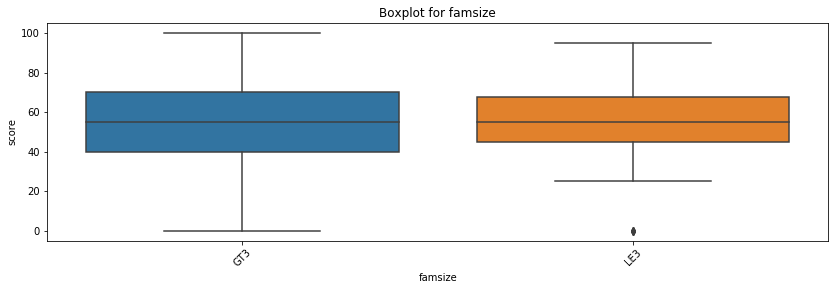

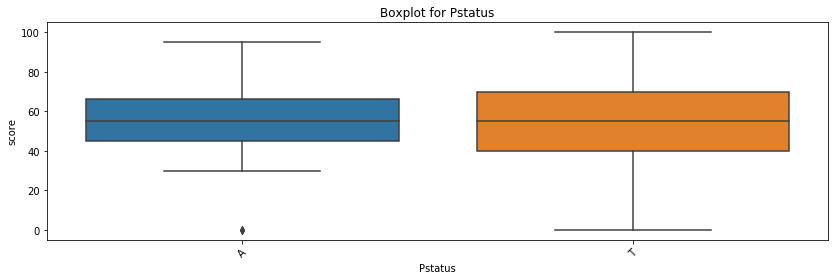

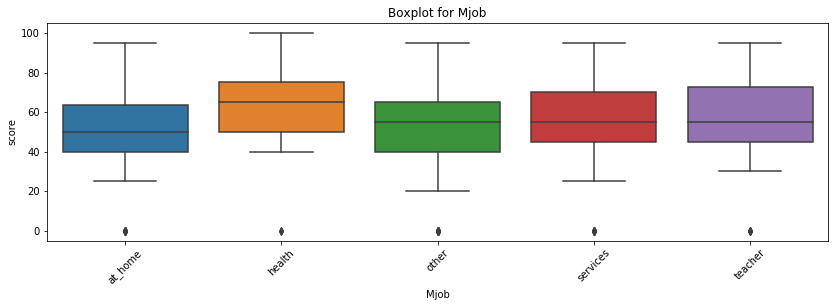

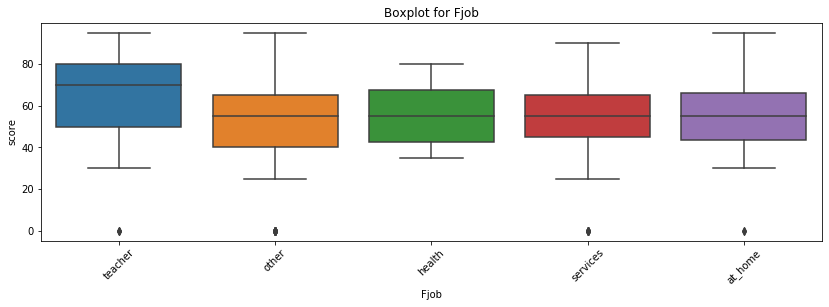

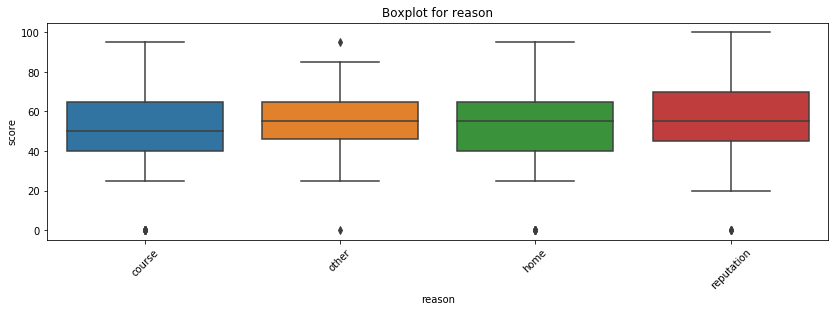

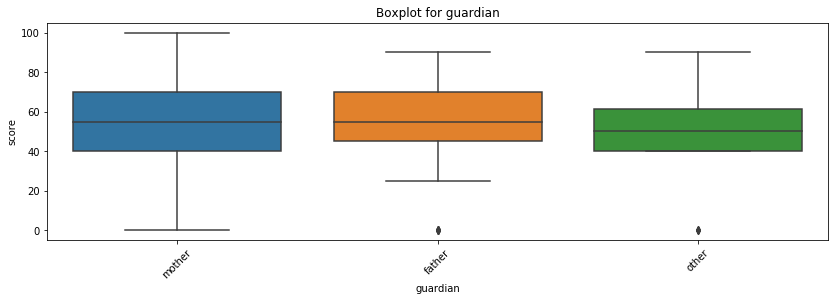

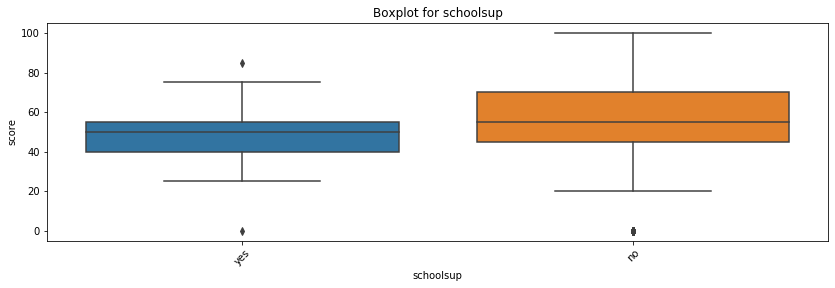

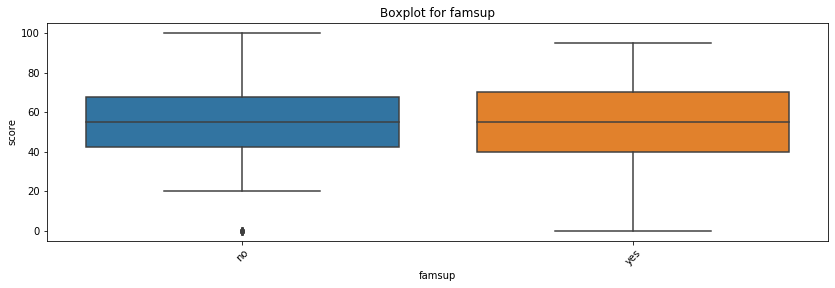

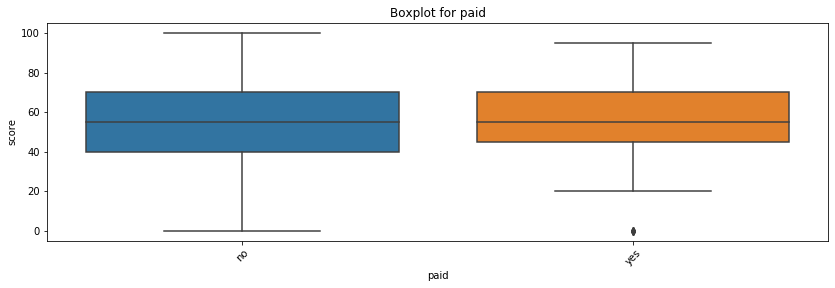

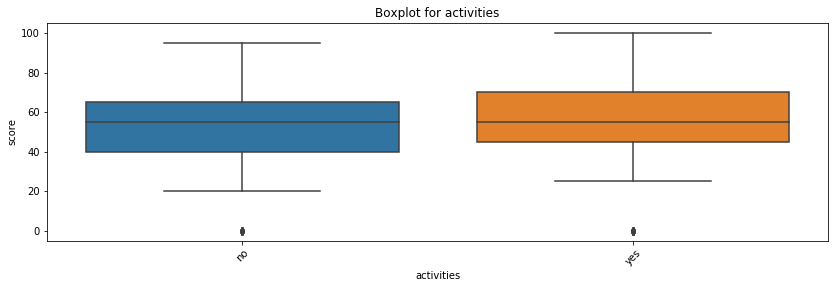

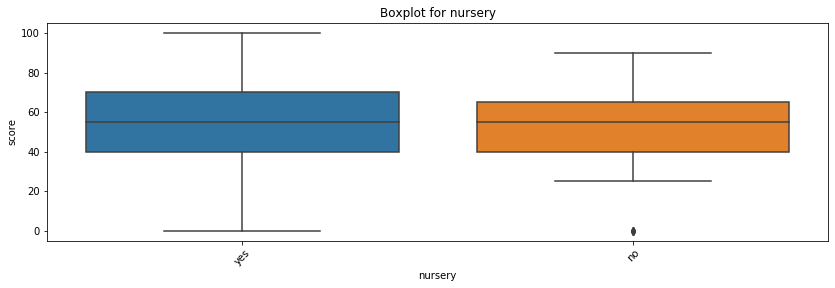

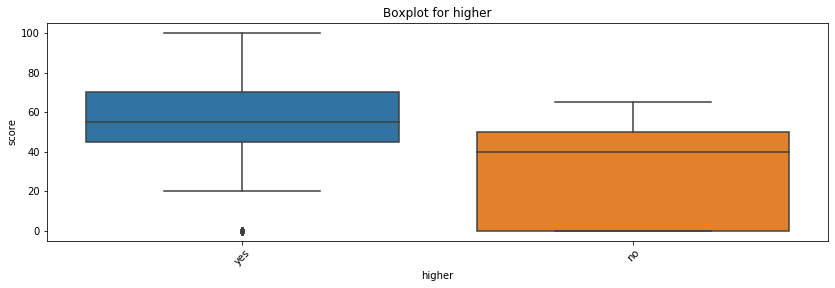

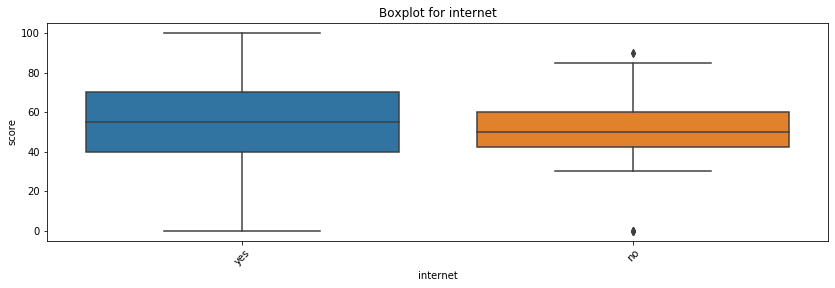

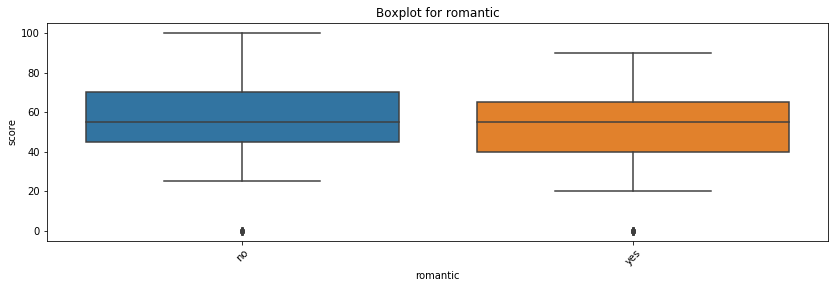

In [9]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Среди данный показателей могут влиять на баллы по госэкзамену по матемтике следующие: schoolsup, higher, Mjob, Fjob, paid, internet. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [19]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [20]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


M:\Fifa 18\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
M:\Fifa 18\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
M:\Fifa 18\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Как мы видно, серьёзно отличается один параметр: Mjob. Оставим эту переменную в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, я бы выделила следующие: age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, schoolsup, higher, Mjob, Fjob, paid, internet.

## Выводы

Итак, в результате EDA для анализа влияния параметров на баллы по госэкзамену по математике были получены следующие выводы:
    1. В данных достаточно много пустых значений.
    2. Выбросы найдены в столбцах Fedu, famrel, absences, что позволяет сделать вывод о том, что данные достаточно чистые.
    3. Данные скоррелированы очень слабо.
    4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, schoolsup, higher, Mjob, Fjob, paid, internet.                  